## Analyse Customer Feedback and Explore Text Classification & Sentiment Analysis 

In [50]:
import pandas as pd
import numpy as np 

df = pd.read_csv('operations_feedbacks.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 27 columns):
StartDate                   3761 non-null object
EndDate                     3761 non-null object
Status                      3761 non-null object
Progress                    3761 non-null object
Duration (in seconds)       3761 non-null object
Finished                    3761 non-null object
RecordedDate                3761 non-null object
ResponseId                  3761 non-null object
DistributionChannel         3761 non-null object
UserLanguage                3761 non-null object
Q_BallotBoxStuffing         196 non-null object
Q4_Browser                  3761 non-null object
Q4_Version                  3761 non-null object
Q4_Operating System         3761 non-null object
Q4_Resolution               3761 non-null object
Q3                          2108 non-null object
Rating                      3333 non-null object
device_model                3761 non-null object
operating_sy

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,device_model,operating_system_name,operating_system_version,app_version,build_number,Q3 - Sentiment Polarity,Q3 - Sentiment Score,Q3 - Sentiment,Q3 - Topics,Topic
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,device_model,operating_system_name,operating_system_version,app_version,build_number,Q3 - Sentiment Polarity,Q3 - Sentiment Score,Q3 - Sentiment,Q3 - Topics,Topic
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""device_model""}","{""ImportId"":""operating_system_name""}","{""ImportId"":""operating_system_version""}","{""ImportId"":""app_version""}","{""ImportId"":""build_number""}","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""Topic_CEDfxhe5s1""}"
2,2019-06-04 08:44:13,2019-06-04 08:45:32,IP Address,100,79,True,2019-06-04 08:45:32,R_10MWmq3mVJVgggs,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,0,-1,Negative,Unknown,Funktionalität
3,2019-06-05 09:36:31,2019-06-05 09:40:19,IP Address,100,228,True,2019-06-05 09:40:19,R_1Ley5R6gxeEX0dX,anonymous,EN,...,iPhone 8,iOS,12.3.1,2.0.1,3313,1,1,Positive,Unknown,Falsche Einträge
4,2019-06-06 17:08:29,2019-06-06 17:08:42,IP Address,100,12,True,2019-06-06 17:08:42,R_1Lcll5Zp1u4ERAT,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [51]:
# drop first two rows
df.drop(df.index[0:2], inplace=True)
df.head(5)

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,device_model,operating_system_name,operating_system_version,app_version,build_number,Q3 - Sentiment Polarity,Q3 - Sentiment Score,Q3 - Sentiment,Q3 - Topics,Topic
2,2019-06-04 08:44:13,2019-06-04 08:45:32,IP Address,100,79,True,2019-06-04 08:45:32,R_10MWmq3mVJVgggs,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,0,-1,Negative,Unknown,Funktionalität
3,2019-06-05 09:36:31,2019-06-05 09:40:19,IP Address,100,228,True,2019-06-05 09:40:19,R_1Ley5R6gxeEX0dX,anonymous,EN,...,iPhone 8,iOS,12.3.1,2.0.1,3313,1,1,Positive,Unknown,Falsche Einträge
4,2019-06-06 17:08:29,2019-06-06 17:08:42,IP Address,100,12,True,2019-06-06 17:08:42,R_1Lcll5Zp1u4ERAT,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,NaN,NaN,NaN,NaN,NaN
5,2019-06-06 21:45:13,2019-06-06 21:46:13,IP Address,100,59,True,2019-06-06 21:46:13,R_3JeYS9ZJNeUnEbJ,anonymous,EN,...,iPhone 7,iOS,12.3.1,2.0.1,3313,0,-8,Negative,Unknown,Feature
6,2019-06-08 18:55:31,2019-06-08 18:55:39,IP Address,100,8,True,2019-06-08 18:55:40,R_Y6sIzOg03u9FdAJ,anonymous,EN,...,iPhone 6s,iOS,12.3.1,2.0.1,3313,NaN,NaN,NaN,NaN,NaN


In [52]:
df1 = df[['StartDate', 'EndDate', 'operating_system_name', 'app_version', 'Q3', 'Rating']]
df1.head(5)

,StartDate,EndDate,operating_system_name,app_version,Q3,Rating
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,Nur Probleme mit Online Service werde immer na...,1
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"Sehr geehrte Damen und Herren, bitte aktualis...",5
4,2019-06-06 17:08:29,2019-06-06 17:08:42,iOS,2.0.1,NaN,5
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,İch möchte gerne die Restschuld meiner Kredite...,2
6,2019-06-08 18:55:31,2019-06-08 18:55:39,iOS,2.0.1,NaN,5


In [53]:
# total number of observations in the data set 
print(df1.count())

# count feedbacks with no written text 
print(df1['Q3'].isnull().sum())

# count feedbacks with no star rating
print(df1['Rating'].isnull().sum())

StartDate                3759
EndDate                  3759
operating_system_name    3759
app_version              3759
Q3                       2106
Rating                   3331
dtype: int64
1653
428


In [54]:
# drop rows with missing values in written feedback or Rating 
dfmod = df1.dropna(how='any', subset=['Q3', 'Rating'])
dfmod.shape[0]

1906

In [55]:
# check if any unnoticed missing values are left 
dfmod.groupby('Q3')['Q3'].count().sort_values(ascending=False)

Q3
Sehr gut                                                                                                                         4
Super                                                                                                                            4
Alles                                                                                                                            3
Fingerabdruck funktioniert nicht                                                                                                 2
Perfekt                                                                                                                          2
                                                                                                                                ..
Mein lfd. Vertrag zur Kfz-Versicherung ist nicht in der App zu sehen                                                             1
Meine A.Version auf meinem S..Phone.  Wird  plötzlich nicht mehr unterstützt. Wa

In [56]:
# inspect data types 
dfmod.dtypes

StartDate                object
EndDate                  object
operating_system_name    object
app_version              object
Q3                       object
Rating                   object
dtype: object

In [57]:
dfmod.head(5)

,StartDate,EndDate,operating_system_name,app_version,Q3,Rating
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,Nur Probleme mit Online Service werde immer na...,1
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"Sehr geehrte Damen und Herren, bitte aktualis...",5
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,İch möchte gerne die Restschuld meiner Kredite...,2
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,Wenn ich mich auf dem iPhone eilogge kommt imm...,3
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,Es wäre ganz toll wenn man auch sehen könnte w...,3


In [58]:
# Convert StartDate and EndDate to datetime variables 
dfmod['StartDate'] = pd.to_datetime(dfmod['StartDate'], format='%Y-%m-%d %H:%M:%S')
dfmod['EndDate'] = pd.to_datetime(dfmod['EndDate'], format='%Y-%m-%d %H:%M:%S')

# check if modification was successful 
dfmod.dtypes

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


StartDate                datetime64[ns]
EndDate                  datetime64[ns]
operating_system_name            object
app_version                      object
Q3                               object
Rating                           object
dtype: object

## Preperation & Exploration

In [59]:
# modify Rating
dfmod['Rating'] = dfmod['Rating'].astype(int)
dfmod.dtypes

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


StartDate                datetime64[ns]
EndDate                  datetime64[ns]
operating_system_name            object
app_version                      object
Q3                               object
Rating                            int64
dtype: object

In [60]:
# convert Rating to binary variable with labes 'happy' and 'sad'
dfmod['Rating_binary'] = dfmod['Rating'].apply(lambda x: 1 if x >=4 else 0)
dfmod.head(5)

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,StartDate,EndDate,operating_system_name,app_version,Q3,Rating,Rating_binary
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,Nur Probleme mit Online Service werde immer na...,1,0
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"Sehr geehrte Damen und Herren, bitte aktualis...",5,1
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,İch möchte gerne die Restschuld meiner Kredite...,2,0
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,Wenn ich mich auf dem iPhone eilogge kommt imm...,3,0
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,Es wäre ganz toll wenn man auch sehen könnte w...,3,0


In [61]:
# convert Rating to three-value variable with labes 5='happy', 4='fine' and 'sad'
dfmod['Rating_thirds'] = dfmod['Rating'].replace([1,2,3,4,5], [0,0,0,1,2])
dfmod.head(5)

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,StartDate,EndDate,operating_system_name,app_version,Q3,Rating,Rating_binary,Rating_thirds
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,Nur Probleme mit Online Service werde immer na...,1,0,0
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"Sehr geehrte Damen und Herren, bitte aktualis...",5,1,2
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,İch möchte gerne die Restschuld meiner Kredite...,2,0,0
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,Wenn ich mich auf dem iPhone eilogge kommt imm...,3,0,0
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,Es wäre ganz toll wenn man auch sehen könnte w...,3,0,0


In [62]:
dfmod.dtypes

StartDate                datetime64[ns]
EndDate                  datetime64[ns]
operating_system_name            object
app_version                      object
Q3                               object
Rating                            int64
Rating_binary                     int64
Rating_thirds                     int64
dtype: object

In [63]:
dfmod['Q3'] = dfmod['Q3'].str.lower()
dfmod.head()

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StartDate,EndDate,operating_system_name,app_version,Q3,Rating,Rating_binary,Rating_thirds
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,nur probleme mit online service werde immer na...,1,0,0
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"sehr geehrte damen und herren, bitte aktualis...",5,1,2
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,i̇ch möchte gerne die restschuld meiner kredit...,2,0,0
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,wenn ich mich auf dem iphone eilogge kommt imm...,3,0,0
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,es wäre ganz toll wenn man auch sehen könnte w...,3,0,0


In [64]:
# add a variable indicating the length of the feedback 
dfmod['feedback_length'] = dfmod['Q3'].apply(len)
dfmod.head()

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,StartDate,EndDate,operating_system_name,app_version,Q3,Rating,Rating_binary,Rating_thirds,feedback_length
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,nur probleme mit online service werde immer na...,1,0,0,113
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"sehr geehrte damen und herren, bitte aktualis...",5,1,2,197
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,i̇ch möchte gerne die restschuld meiner kredit...,2,0,0,54
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,wenn ich mich auf dem iphone eilogge kommt imm...,3,0,0,198
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,es wäre ganz toll wenn man auch sehen könnte w...,3,0,0,85


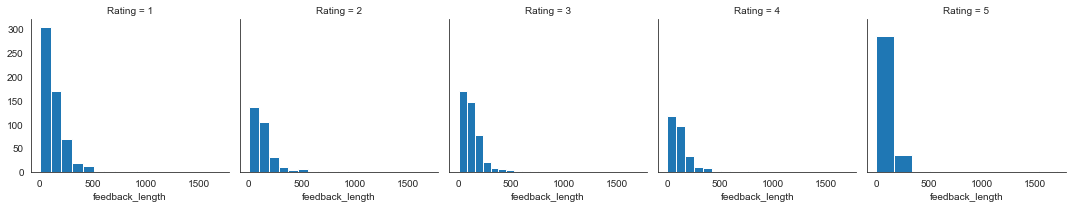

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(dfmod,col='Rating')
g.map(plt.hist,'feedback_length')

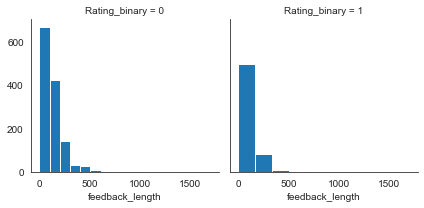

In [66]:
g = sns.FacetGrid(dfmod,col='Rating_binary')
g.map(plt.hist,'feedback_length')

In [67]:
# Print most frequent N-grams in the file (code from: https://gist.github.com/benhoyt/dfafeab26d7c02a52ed17b6229f0cb52)
import collections
import re
import sys
import time

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

In [68]:
def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

In [69]:
happy_feedbacks = dfmod.query('Rating_binary == 1')['Q3']
happy_feedbacks.head()

3     sehr geehrte damen und herren,  bitte aktualis...
17                  kann ich momentan nicht entscheiden
23    die app ist sehr übersichtlich und durchdacht,...
26                                            ist i o  
30                   ooops vorher zu früh abgeschickt 🤓
Name: Q3, dtype: object

In [70]:
unhappy_feedbacks = dfmod.query('Rating_binary == 0')['Q3']
unhappy_feedbacks.head()

2     nur probleme mit online service werde immer na...
5     i̇ch möchte gerne die restschuld meiner kredit...
7     wenn ich mich auf dem iphone eilogge kommt imm...
15    es wäre ganz toll wenn man auch sehen könnte w...
20    anmeldung ist nervig. passworteinschränkungen ...
Name: Q3, dtype: object

In [71]:
# create word clouds with most frequent words in (un)happy reviews
most_frequent_happyreviews = count_ngrams(happy_feedbacks,max_length=5)
most_frequent_unhappyreviews = count_ngrams(happy_feedbacks,max_length=5)

In [72]:
print_most_frequent(most_frequent_happyreviews, num= 10)

----- 10 most common 2-grams -----
die app: 67
in der: 52
der app: 49
kann ich: 26
sehr gut: 26
es wäre: 22
app ist: 21
wenn man: 20
z b: 19
über die: 16

----- 10 most common 3-grams -----
in der app: 28
die app ist: 14
es wäre schön: 13
wäre schön wenn: 13
über die app: 10
ich die app: 9
wie kann ich: 9
schön wenn man: 7
mit freundlichen grüßen: 7
mit der app: 7

----- 10 most common 4-grams -----
es wäre schön wenn: 12
wäre schön wenn man: 7
die app ist sehr: 4
alles was man braucht: 4
mehr details zu den: 4
finde ich die app: 4
sehr geehrte damen und: 3
geehrte damen und herren: 3
app ist sehr übersichtlich: 3
ist sehr übersichtlich und: 3

----- 10 most common 5-grams -----
es wäre schön wenn man: 7
sehr geehrte damen und herren: 3
die app ist sehr übersichtlich: 3
app ist sehr übersichtlich und: 3
mehr details zu den verträgen: 3
sonst finde ich die app: 3
sehr zufrieden mit der app: 3
wäre schön wenn man alte: 2
schön wenn man alte nachrichten: 2
in der app zu sehen: 2



In [73]:
print_most_frequent(most_frequent_unhappyreviews, num= 10)

----- 10 most common 2-grams -----
die app: 67
in der: 52
der app: 49
kann ich: 26
sehr gut: 26
es wäre: 22
app ist: 21
wenn man: 20
z b: 19
über die: 16

----- 10 most common 3-grams -----
in der app: 28
die app ist: 14
es wäre schön: 13
wäre schön wenn: 13
über die app: 10
ich die app: 9
wie kann ich: 9
schön wenn man: 7
mit freundlichen grüßen: 7
mit der app: 7

----- 10 most common 4-grams -----
es wäre schön wenn: 12
wäre schön wenn man: 7
die app ist sehr: 4
alles was man braucht: 4
mehr details zu den: 4
finde ich die app: 4
sehr geehrte damen und: 3
geehrte damen und herren: 3
app ist sehr übersichtlich: 3
ist sehr übersichtlich und: 3

----- 10 most common 5-grams -----
es wäre schön wenn man: 7
sehr geehrte damen und herren: 3
die app ist sehr übersichtlich: 3
app ist sehr übersichtlich und: 3
mehr details zu den verträgen: 3
sonst finde ich die app: 3
sehr zufrieden mit der app: 3
wäre schön wenn man alte: 2
schön wenn man alte nachrichten: 2
in der app zu sehen: 2



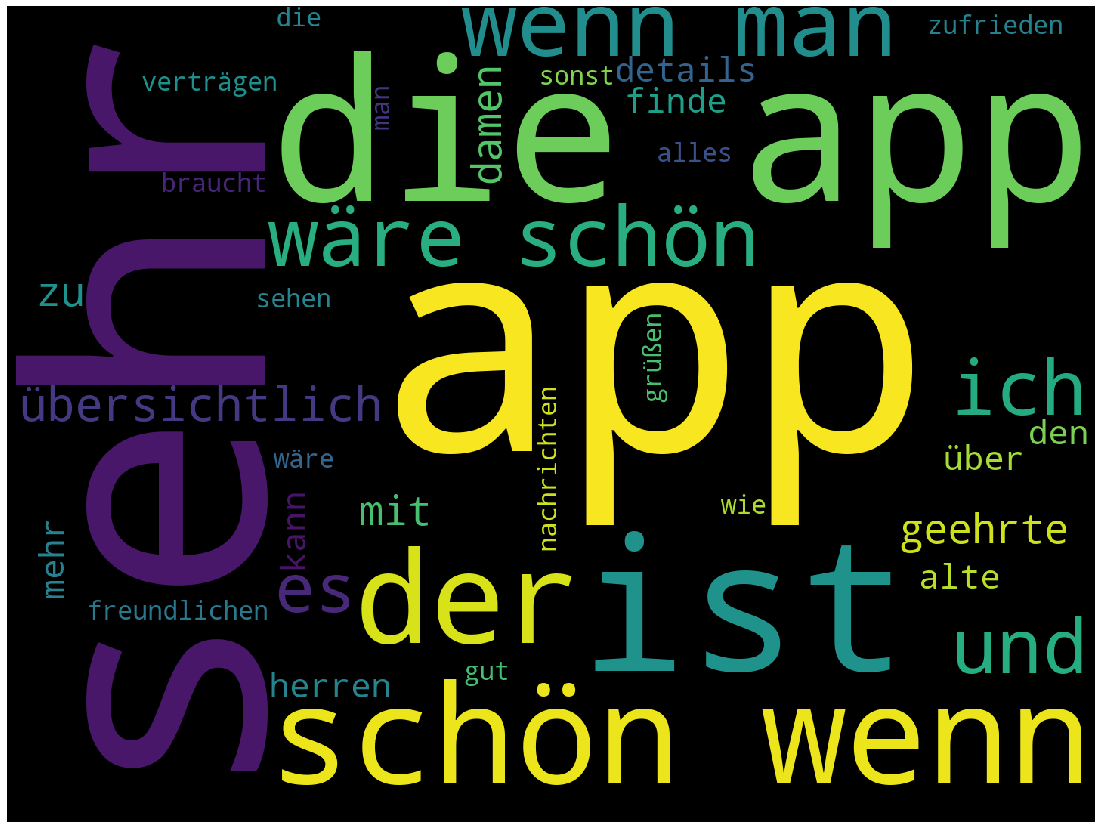

In [74]:
# Generate a word cloud image for happy reviews
print_word_cloud(most_frequent_happyreviews, 10)

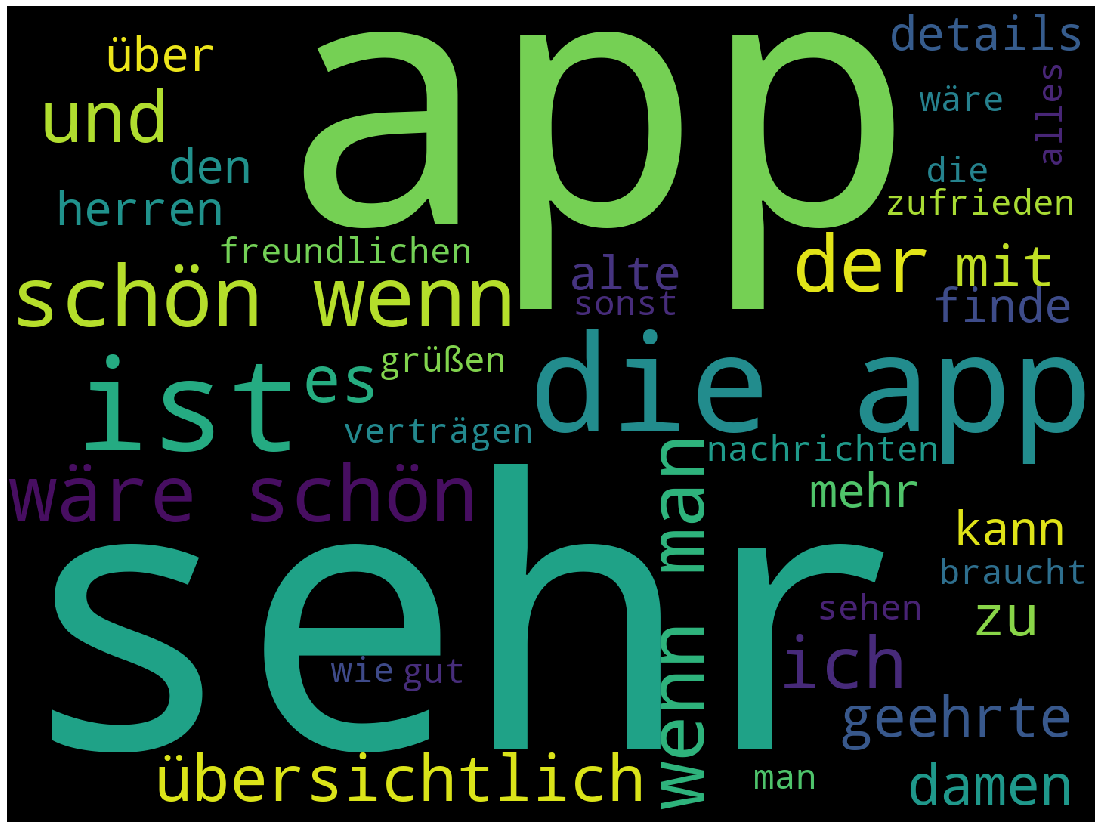

In [75]:
# Generate a word cloud image for happy reviews
print_word_cloud(most_frequent_unhappyreviews, 10)

## Modelling

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfmod['Q3'], 
                                                    dfmod['Rating_binary'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(dfmod.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1906
Number of rows in the training set: 1429
Number of rows in the test set: 477


In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [94]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
predictions = naive_bayes.predict(testing_data)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7589098532494759
Precision score:  0.803921568627451
Recall score:  0.2808219178082192
F1 score:  0.41624365482233505


In [97]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [118]:
# now with SVM 
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(training_data, y_train)

#Predict the response for test dataset
y_pred = clf_svm.predict(testing_data)

In [119]:
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))

Accuracy score:  0.7337526205450734
Precision score:  0.5725190839694656
Recall score:  0.5136986301369864
F1 score:  0.5415162454873647


In [ ]:
# or with RF

In [120]:
#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(training_data,y_train)

y_pred=clf_rf.predict(testing_data)

In [121]:
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))

Accuracy score:  0.7651991614255765
Precision score:  0.7361111111111112
Recall score:  0.363013698630137
F1 score:  0.48623853211009177


In [ ]:
## SVM with hyper parameter tuning 

In [107]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(training_data, y_train) 

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.688, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.688, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.706, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.717, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.716, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.725, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.732, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.733, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.686, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   14.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [108]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [110]:
grid_predictions = grid.predict(testing_data) 

In [112]:
print('Accuracy score: ', format(accuracy_score(y_test, grid_predictions)))
print('Precision score: ', format(precision_score(y_test, grid_predictions)))
print('Recall score: ', format(recall_score(y_test, grid_predictions)))
print('F1 score: ', format(f1_score(y_test, grid_predictions)))

Accuracy score:  0.7568134171907757
Precision score:  0.8409090909090909
Recall score:  0.2534246575342466
F1 score:  0.38947368421052636


In [ ]:
# RF with hyper parameter tuning

In [116]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [122]:
CV_rfc = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(training_data, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [124]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [125]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')

In [126]:
rfc1.fit(training_data, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [127]:
predictions = rfc1.predict(testing_data)

In [129]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions, average='weighted')))
print('Recall score: ', format(recall_score(y_test, predictions,average='weighted')))
print('F1 score: ', format(f1_score(y_test, predictions, average='weighted')))

Accuracy score:  0.6939203354297694
Precision score:  0.48152543192296365
Recall score:  0.6939203354297694
F1 score:  0.5685337401664694


/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
